# Checking Datatypes in DataLoaders

## Description
The purpose of this notebook is to 
<br>
a) check if a dataloader is loading an image or a tensor, and 
<br>
b) to double check there if the image/tensor a floating-point type

This will have implications in our implementation of some of the preprocessing and visualization helper functions, such as
- `dataset_stat_prop`
- `display_image_batch`

## Directory Structure

It's assumed the directory structure is as follows

``` bash
.
├── data/
│   └── 02_forest_fire_dataset/
│       ├── testing/
│       └── training/
└── jupyter_notebooks/
```

# Import Usual Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# display images and plots in high resolution
%config InlineBackend.figure_format = 'retina'

## Import Custom Modules

In [3]:
import sys 
sys.path

['/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python312.zip',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/lib-dynload',
 '',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages']

In [4]:
# Append '..' to python Path so it finds my custom modules
sys.path.append('..')
sys.path

['/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python312.zip',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/lib-dynload',
 '',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages',
 '..']

In [5]:
# module to create a custom dataset
from src.data.create_dataset import CustomFireImagesDataset

In [7]:
# module to display a batch of images from a dataset
from src.visualization.plot_images import display_image_batch

In [8]:
# module to calculate statistical properties of the dataset
from src.data.dataset_properties import dataset_stat_prop

# Loading two Datasets
First we'll load two datasets
- the `CIFAR10`
- A custom `02_forest_fire_dataset`

Note that `CIFAR10` is maintained by PyTorch and for the latter we use `CustomFireImagesDataset`

In [12]:
# from torch.utils.data import ConcatDataset
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### CIFAR10

In [22]:
# define the train dataset and dataloader
# NOTE we are setting the `transform` to None, and the dataset is not shuffled

train_dataset_cifar10 = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, 
                                                     transform = None)

train_dataloader_cifar10 = torch.utils.data.DataLoader(train_dataset_cifar10,
                                                       batch_size = 1, shuffle = False, num_workers = 2)

Files already downloaded and verified


In [40]:
# Define the classes in the dataset
classes_cifar10 = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### 02_forest_fire_dataset

In [11]:
# First creat the paths to annotation files and datasets

path_to_dataset = '../data_preprocessing/02_forest_fire_dataset/'
annotations_file_test = 'labels_02_test_dataset_prep.csv'
annotations_file_train = 'labels_02_train_dataset_prep.csv'

In [14]:
# define datset and dataloader
# NOTE: we're setting `transform` to None, and the dataset is not shuffled

train_dataset_02dataset =  CustomFireImagesDataset(annotations_file_train, path_to_dataset,
                                                  transform = None)

train_dataloader_02dataset = DataLoader(train_dataset_02dataset, batch_size = 4, 
                                        shuffle = False, num_workers = 2)

In [45]:
# Define the classes in the dataset
classes_02dataset = ('non-fire','fire')

# Extract Images and Check Datatypes
To extract a single batch of images, we need to iterate over the contents of the dataset

### CIFAR10

In [23]:
batch = iter(train_dataloader_cifar10)
img, labels = next(batch)

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 277, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 144, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 152, in collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>


#### First Error 
We can see that the batch calls for tensors, numpy arrays, numbers, dicts or lists, but instead there were PIL images. 
Therefore, the first transformation that we would need for the dataset would be to make it into a tensor.

#### Re-instate dataset and dataloader

In [60]:
curr_transform = transforms.ToTensor()

train_dataset_cifar10_v2 = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, 
                                                     transform = curr_transform)

train_dataloader_cifar10_v2 = torch.utils.data.DataLoader(train_dataset_cifar10_v2,
                                                       batch_size = 1, shuffle = False, num_workers = 2)

Files already downloaded and verified


In [61]:
# get the first set of images and labels
batch = iter(train_dataloader_cifar10_v2)
img, labels = next(batch)

In [62]:
img.shape

torch.Size([1, 3, 32, 32])

In [63]:
img.dtype

torch.float32

In [64]:
type(img)

torch.Tensor

### 02_forest_fire_dataset

In [32]:
batch = iter(train_dataloader_02dataset)
img, labels = next(batch)

This has no issue. I think it has to do with how images are loaded in my custom data loader. More on that later.

In [33]:
img.shape

torch.Size([4, 3, 250, 250])

In [34]:
img.dtype

torch.uint8

In [35]:
type(img)

torch.Tensor

The `CustomFireImagesDataset` uses `torchvision.io.read_image()` to laod images into the dataset. According to the [documentation](https://pytorch.org/vision/master/generated/torchvision.io.read_image.html), the function:
```
Reads a JPEG or PNG image into a 3 dimensional RGB or grayscale Tensor. Optionally converts the image to the desired format. The values of the output tensor are uint8 in [0, 255].
```

# Try to Display Images
- with no transformation
- after cropping

In [39]:
display_image_batch?

Signature: display_image_batch(data_loader, n_batches, img_classes)
Docstring:
Function to display a batch of images from a dataloader

Parameters
----------
data_loader : object
    PyTorch dataloader object
n_batches : integer
    Number of batches to display
img_classes : tuple
    Image classes contained in the dataset
File:      ~/Documents/BrainStation/Capstone Project/capstone_project/src/visualization/plot_images.py
Type:      function

### CIFAR10

In [43]:
# using the original train dataloader will give an error, because internally 
# `display_image_batch` will try to iterate

# display_image_batch(train_dataloader_cifar10,2,classes_cifar10)

 frog


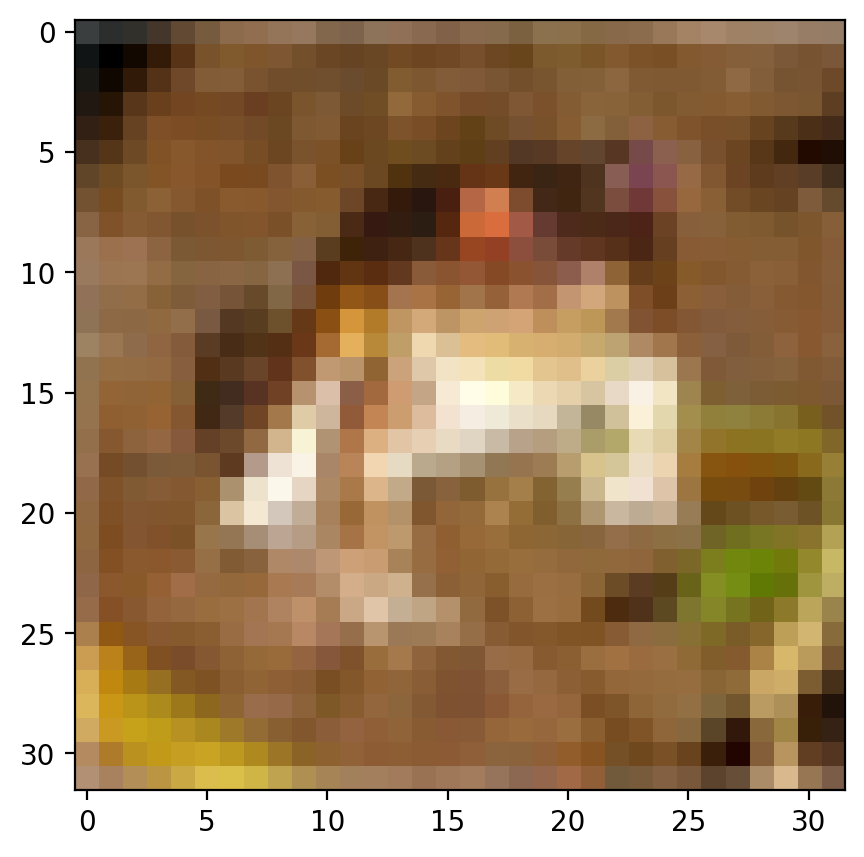

truck


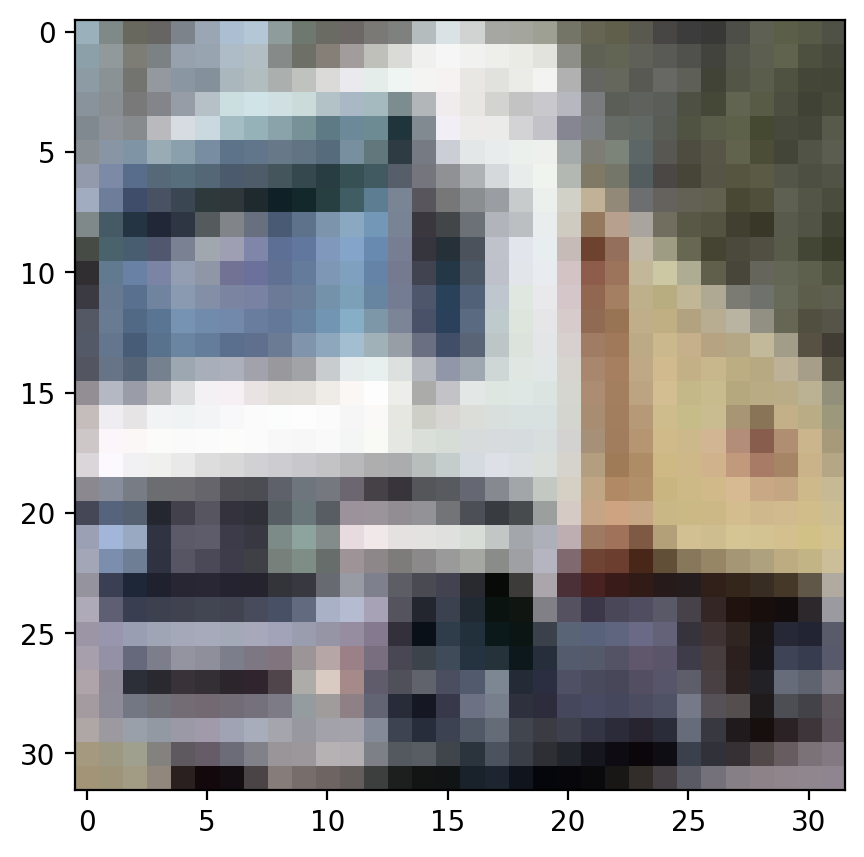

In [44]:
display_image_batch(train_dataloader_cifar10_v2,2,classes_cifar10)

### 02_forest_fire_dataset

non-fire non-fire non-fire non-fire


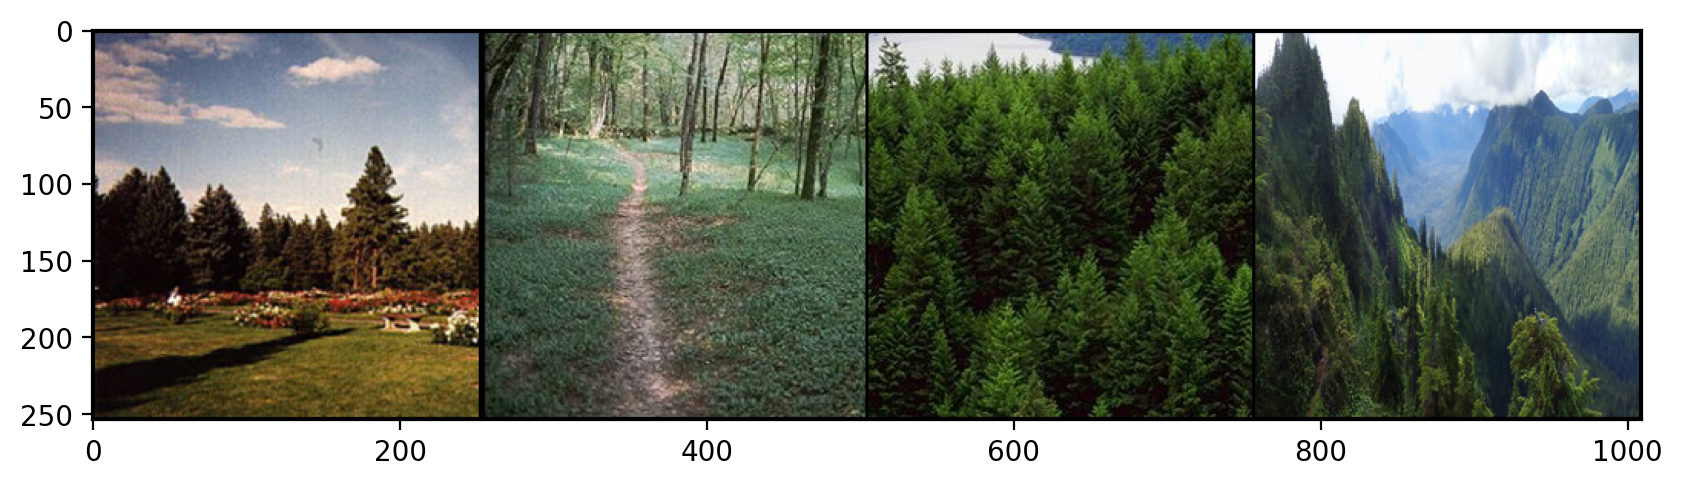

non-fire non-fire non-fire non-fire


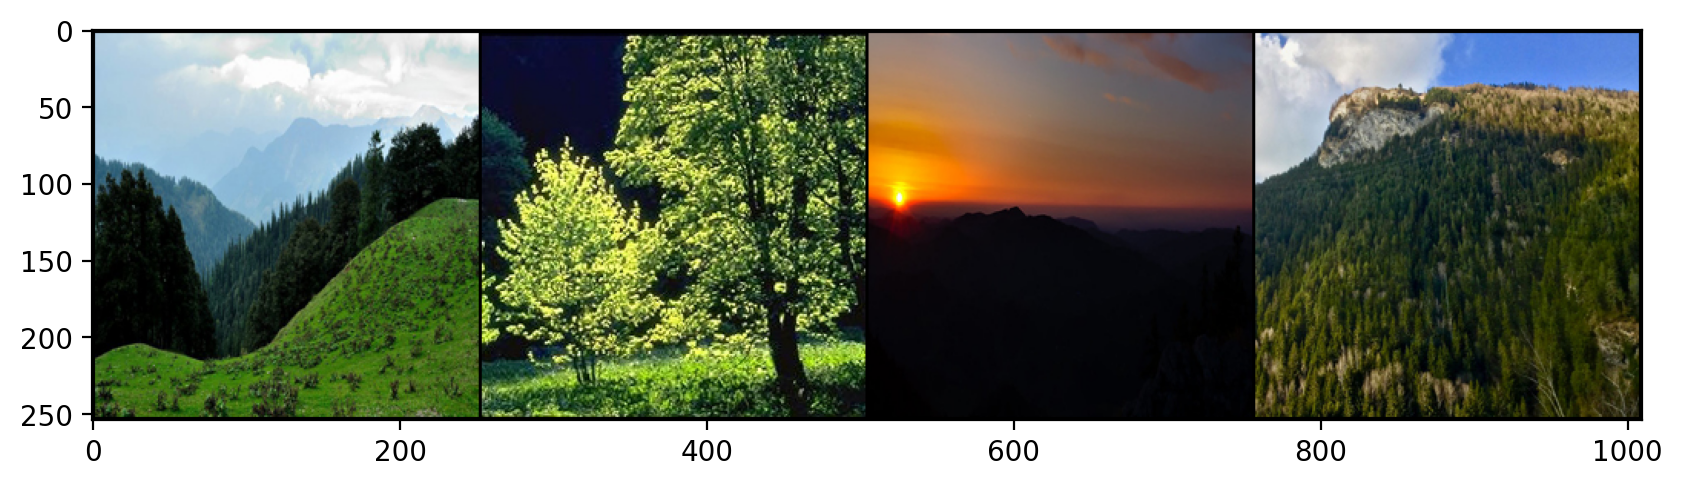

In [46]:
display_image_batch(train_dataloader_02dataset,2,classes_02dataset)

No issues with the custom dataset when using original size images. In practice we'll have to resize them through a transform. Let's try displaying after transformation.

#### Resizing Dataset

In [49]:
resizing = transforms.Resize(size = (32,32))

In [50]:
#  We're now doing a new instance of the 02 dataset after resizing

train_dataset_02dataset_v2 =  CustomFireImagesDataset(annotations_file_train, path_to_dataset,
                                                  transform = resizing)

train_dataloader_02dataset_v2 = DataLoader(train_dataset_02dataset_v2, batch_size = 4, 
                                        shuffle = False, num_workers = 2)

non-fire non-fire non-fire non-fire


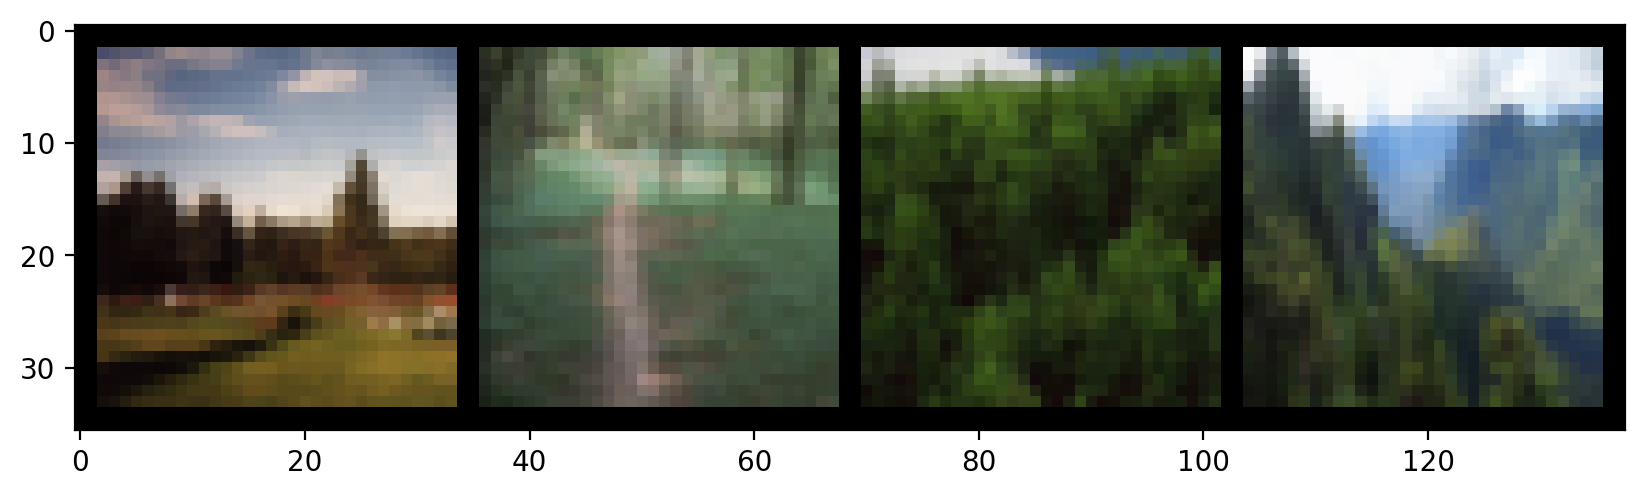

non-fire non-fire non-fire non-fire


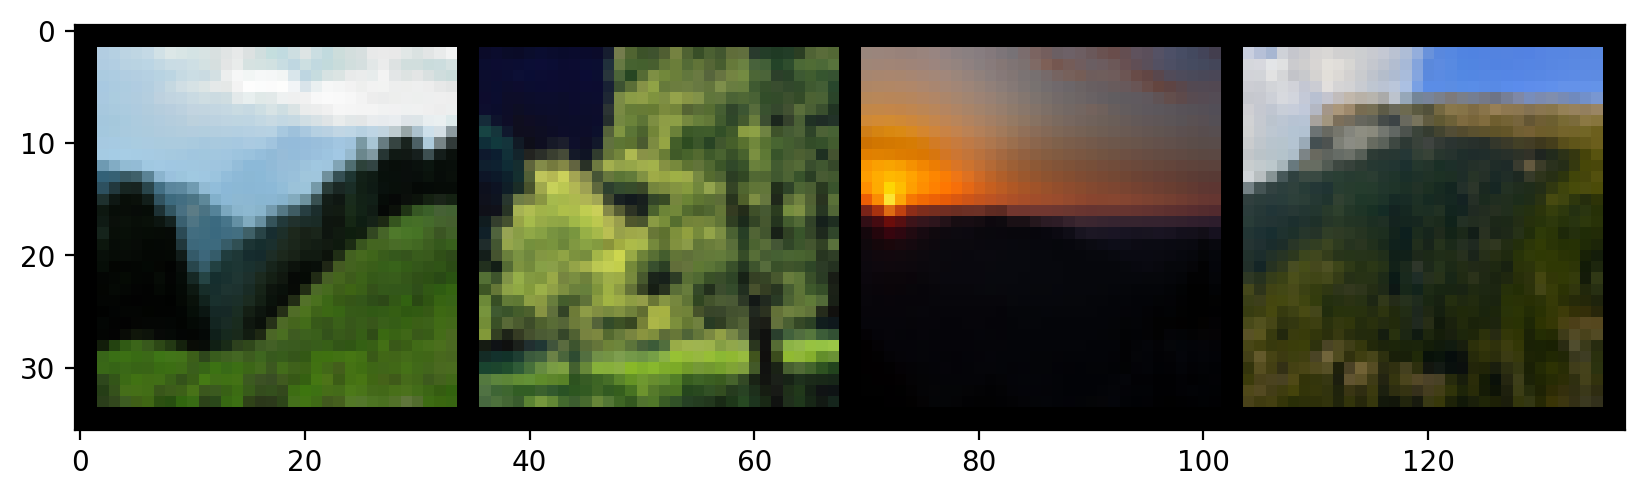

In [51]:
display_image_batch(train_dataloader_02dataset_v2,2,classes_02dataset)

No issues with this.

# Try to calculate statistical properties
- with no transformation
- after converting to tensor

In [52]:
dataset_stat_prop?

Signature: dataset_stat_prop(dataset)
Docstring:
Function to calculate the statistical properties of a custom dataset

Parameters
----------
dataset : object
    Pytorch dataset object

Returns
-------
Tuple
    mean and standard deviation of all images in dataset
File:      ~/Documents/BrainStation/Capstone Project/capstone_project/src/data/dataset_properties.py
Type:      function

### CIFAR10

First let's try the `train_dataset_cifar10`, probably will fail as we cannot iterate and stack PIL images

In [53]:
mean,std = dataset_stat_prop(train_dataset_cifar10)

TypeError: expected Tensor as element 0 in argument 0, but got Image

Indeed, it cannot iterate on images. 

Next, let's try with `train_dataset_cifar10_v2`

In [56]:
mean,std = dataset_stat_prop(train_dataset_cifar10_v2)

TypeError: expected Tensor as element 0 in argument 0, but got Image

I believe the error comes from converting to datatypes inside `dataset_stat_prop()`. We'll try a modified version to trace the error.

In [133]:
from torch.utils.data import ConcatDataset
import torch
# import torchvision.transforms as transforms
# from torchvision.transforms import v2


def dataset_stat_prop_modified(dataset):
    """Function to calculate the statistical properties of a custom dataset
    
    Parameters
    ----------
    dataset : object
        Pytorch dataset object
    
    Returns
    -------
    Tuple
        mean and standard deviation of all images in dataset
    """

    # UPDATE --- COMMMENTING THIS SECTION OUT
    # Convert dataset into floating point otherwise it can't calculate the mean and std
    # dataset.transform = transforms.v2.ToDtype(torch.float)
    
    # stack all images together into a tensor of shape 
    # (N_images, 3, Height, Width)
    # note `sample` is a tuple with (tensor, label)
    
    x = torch.stack([sample[0] for sample in ConcatDataset([dataset])])

    # Get mean and standard deviation. Note we're getting the statistical properties
    # along all images (dim 0), all heights (dim 2) and all widths (dim 3) leaving
    # resulting in a 1 x 3 tensor 
    
    mean = torch.mean(x, dim = (0,2,3)) 
    std = torch.std(x, dim = (0,2,3))

    return mean, std

In [66]:
mean,std = dataset_stat_prop_modified(train_dataset_cifar10_v2)

In [67]:
mean

tensor([0.4914, 0.4822, 0.4465])

In [68]:
std

tensor([0.2470, 0.2435, 0.2616])

So the calculation goes smoothly here. Let's try the next dataset.

### 02_forest_fire_dataset

In [69]:
mean,std = dataset_stat_prop_modified(train_dataset_02dataset)

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Byte

Now the error results in the output datatype. We did not encounter this error before because the CIFAR10 was already converted as tensor in the [0,1] interval. 
Therefore, we have 2 options:
- Only input train datasets with tensors ranging between 0 and 1 and calculate statistical properties
- Input the uint8 tensors, divide by 255, and calculate statistical properties to be used for training

We'll pursue the latter approach, by using a composite transformation.

First a sanity check.

In [121]:
# define datset and dataloader
# No transform
# No shuffle
# Only a batch size of 1

dataset_02dataset_orig =  CustomFireImagesDataset(annotations_file_train, path_to_dataset,
                                                  transform = None)

dataloader_02dataset_orig = DataLoader(dataset_02dataset_orig, batch_size = 1, shuffle = False, num_workers = 2)

In [122]:
# Extract a single image and labels

img,lab = next(iter(dataloader_02dataset_orig))

In [123]:
print('Image type\t',type(img))
print('Datatype\t',img.dtype)
print('Max value\t',img.max())
print('Min value\t',img.min())

Image type	 <class 'torch.Tensor'>
Datatype	 torch.uint8
Max value	 tensor(255, dtype=torch.uint8)
Min value	 tensor(0, dtype=torch.uint8)


Now we're going to compose a transformation to go from uint8 to float and map everything from [0,255] to [0,1]

In [124]:
# Convert uint8 to float and divide by 255. This is the equivalent of ToTensor() when used on a PIL image
test_transf = transforms.Compose([transforms.v2.ToDtype(torch.float),
                                  transforms.Normalize(mean = [0,0,0],std = [255,255,255])])

# No shuffle
# Only batch size of 1

dataset_02dataset_modified =  CustomFireImagesDataset(annotations_file_train, path_to_dataset,
                                                      transform = test_transf)

dataloader_02dataset_modified = DataLoader(dataset_02dataset_modified, batch_size = 1, shuffle = False, num_workers = 2)

img,lab = next(iter(train_dataloader_02dataset))

In [125]:
print('Image type\t',type(img))
print('Datatype\t',img.dtype)
print('Max value\t',img.max())
print('Min value\t',img.min())

Image type	 <class 'torch.Tensor'>
Datatype	 torch.float32
Max value	 tensor(1.)
Min value	 tensor(0.)


Now let's try to calculate the statistical properties of the whole modified dataset

In [126]:
mean,std = dataset_stat_prop_modified(dataset_02dataset_modified)

In [127]:
print('Mean\t',mean)
print('STD\t',std)

Mean	 tensor([0.4243, 0.3611, 0.2844])
STD	 tensor([0.2801, 0.2486, 0.2686])


Finally, let's repeat this exercise with the resized images

In [129]:
# Convert uint8 to float and divide by 255. This is the equivalent of ToTensor() when used on a PIL image
resize_transf = transforms.Compose([transforms.v2.ToDtype(torch.float),
                                    transforms.Normalize(mean = [0,0,0],std = [255,255,255]),
                                    transforms.Resize(size=(32,32))
                                   ])

# No shuffle
dataset_02dataset_resized =  CustomFireImagesDataset(annotations_file_train, path_to_dataset,
                                                      transform = resize_transf)

dataloader_02dataset_resized = DataLoader(dataset_02dataset_resized, batch_size = 4, shuffle = False, num_workers = 2)

In [130]:
mean,std = dataset_stat_prop_modified(dataset_02dataset_resized)

In [131]:
print('Mean\t',mean)
print('STD\t',std)

Mean	 tensor([0.4244, 0.3611, 0.2844])
STD	 tensor([0.2603, 0.2299, 0.2556])


non-fire non-fire non-fire non-fire


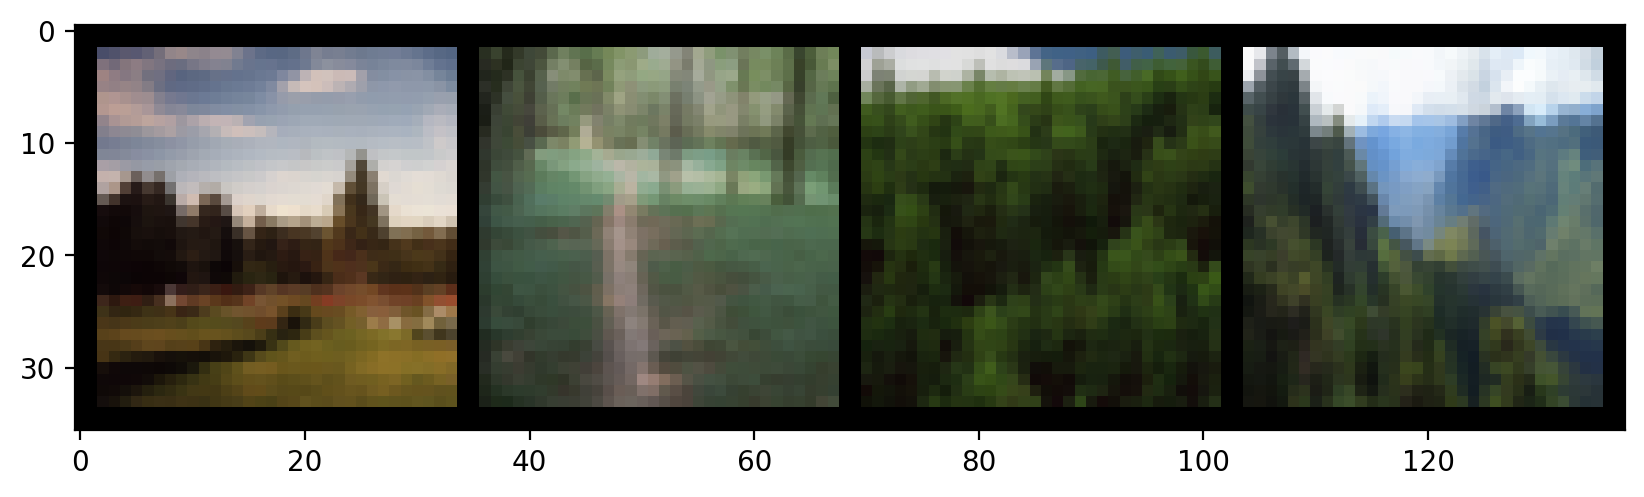

non-fire non-fire non-fire non-fire


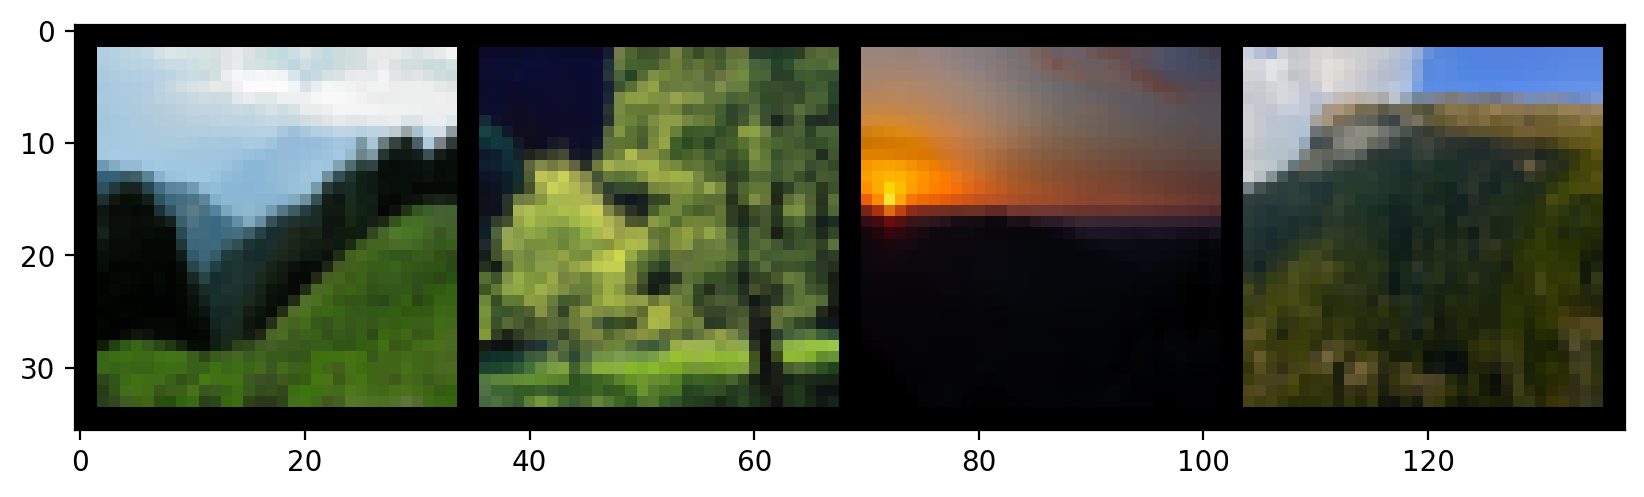

In [132]:
display_image_batch(dataloader_02dataset_resized,2,classes_02dataset)

# Lessons Learned
- Images from `torchvision.datasets` are automatically loaded as PIL images and need to be transformed to tensors.
- Images from `CustomFireImagesDataset` are automatically loaded as uint8 tensors in [0,255].
- Any time you need to iterate through a dataloader, the images in the dataset should **not** be PIL type.
- Tensors from the `CustomFireImagesDataset` need to be converted to the [0,1] interval to get the correct statistical properties. This is achieved with a composite transformation as shown below

```Python
# Convert uint8 to float and divide by 255. This is the equivalent of ToTensor() when used on a PIL image
new_transf = transforms.Compose([transforms.v2.ToDtype(torch.float),transforms.Normalize(mean = [0,0,0],std = [255,255,255])])
```

I'll update the `dataset_stat_prop()` function so that it performs the correct calculation.